In [117]:
from IPython.display import Math
Math(r't^*(x) = argmin_{t"}( \int_{t<>t"} p(t|x) dt)=argmax_t(p(t|x)) ')


<IPython.core.display.Math object>

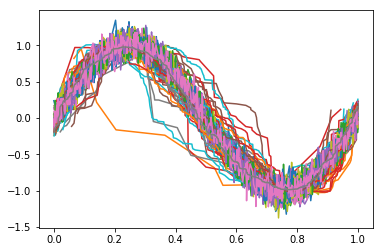

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
LD=np.ones(49)
LP=np.ones(49)
for N in range(1,50):
  X = np.random.random_sample(N*10)
  X = sorted(X)
  X=np.array(X)
  Y = np.random.normal(loc = np.sin(2*np.pi*X), scale = 0.1)
  m=3
  F=np.ones((N*10,m+1))
  for i in range(m+1):
      F[:,i] = X**i
  Z=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(F),F)),np.transpose(F)),Y)
  Xn = np.random.random_sample(N*10)
  Xn = sorted(Xn)
  Xn=np.array(Xn)
  Yn = np.random.normal(loc = np.sin(2*np.pi*Xn), scale = 0.1)
  fig1=plt.plot(Xn, Yn)
  Z=np.transpose(Z)
  Fn=np.ones((N*10,m+1))
  for i in range(m+1):
      Fn[:,i] = Xn**i
  Zn=np.matmul(F,Z)
  fig2=plt.plot(Xn, Zn)
  LD[N-1]=np.sum((Yn-Zn)**2)/N
  LP[N-1]= integrate.quad(lambda x: (Yn[1]-Z[0]+x*Z[1]+x*x*Z[2]+x*x*x*Z[3])**2, 0, 1)[0]

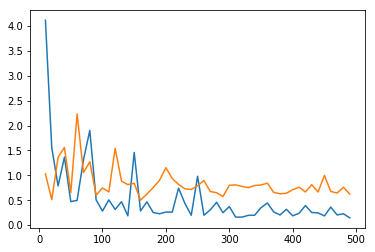

In [110]:
plt.plot( 10*np.arange(1,50), LD)
plt.plot( 10*np.arange(1,50), LP)